# Exploratory Data Analysis Starter

## Import packages

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_rows', 500)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
client_df = pd.read_csv('client_data (1).csv')
price_df = pd.read_csv('price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [272]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
# Client information has 7 18 numerical and 8 object columns
# Pricing information has 2 categorical and 6 numerical columns

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [10]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [11]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


# EXPLORATORY DATA ANALYSIS

# DATA CLEANING AND IDENTIFYING NULL VALUES

# CLIENT DATAFRAME

In [24]:
datadict_client = pd.DataFrame(client_df.dtypes)
# identify missing values of the 11 columns,add the stats to the datadict
datadict_client['MissingVal'] = client_df.isnull().sum()

# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict_client['NUnique']=client_df.nunique()
datadict_client


datadict_client['Count']=client_df.count()
datadict_client

datadict_client = datadict_client.rename(columns={0:'DataType'})
datadict_client


,DataType,MissingVal,NUnique,Count
id,object,0,14606,14606
channel_sales,object,0,8,14606
cons_12m,int64,0,11065,14606
cons_gas_12m,int64,0,2112,14606
cons_last_month,int64,0,4751,14606
date_activ,object,0,1796,14606
date_end,object,0,368,14606
date_modif_prod,object,0,2129,14606
date_renewal,object,0,386,14606
forecast_cons_12m,float64,0,13993,14606


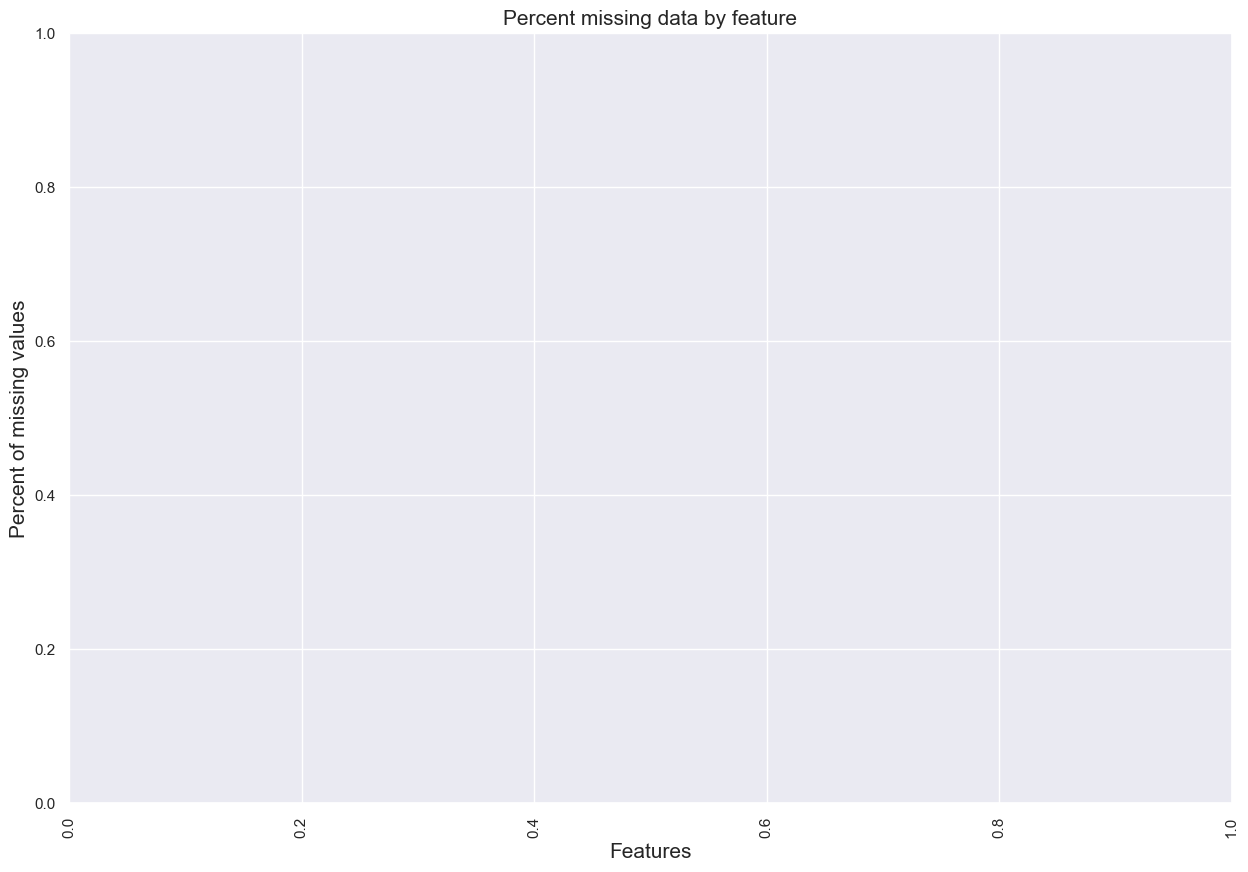

In [22]:
# PLOTTING PERCENT OF NULL VALUES

nan_count=((client_df.isna().sum()/client_df.shape[0])*100).sort_values(ascending=False)
nan_count=nan_count[nan_count>0]
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x= nan_count.index,y = nan_count.values, df = nan_count)
plt.show()

In [ ]:
# PRICE DATA

In [25]:
datadict_price = pd.DataFrame(price_df.dtypes)
# identify missing values of the 11 columns,add the stats to the datadict
datadict_price['MissingVal'] = price_df.isnull().sum()

# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict_price['NUnique']=price_df.nunique()
datadict_price


datadict_price['Count']=price_df.count()
datadict_price

datadict_price = datadict_client.rename(columns={0:'DataType'})
datadict_price


,DataType,MissingVal,NUnique,Count
id,object,0,14606,14606
channel_sales,object,0,8,14606
cons_12m,int64,0,11065,14606
cons_gas_12m,int64,0,2112,14606
cons_last_month,int64,0,4751,14606
date_activ,object,0,1796,14606
date_end,object,0,368,14606
date_modif_prod,object,0,2129,14606
date_renewal,object,0,386,14606
forecast_cons_12m,float64,0,13993,14606


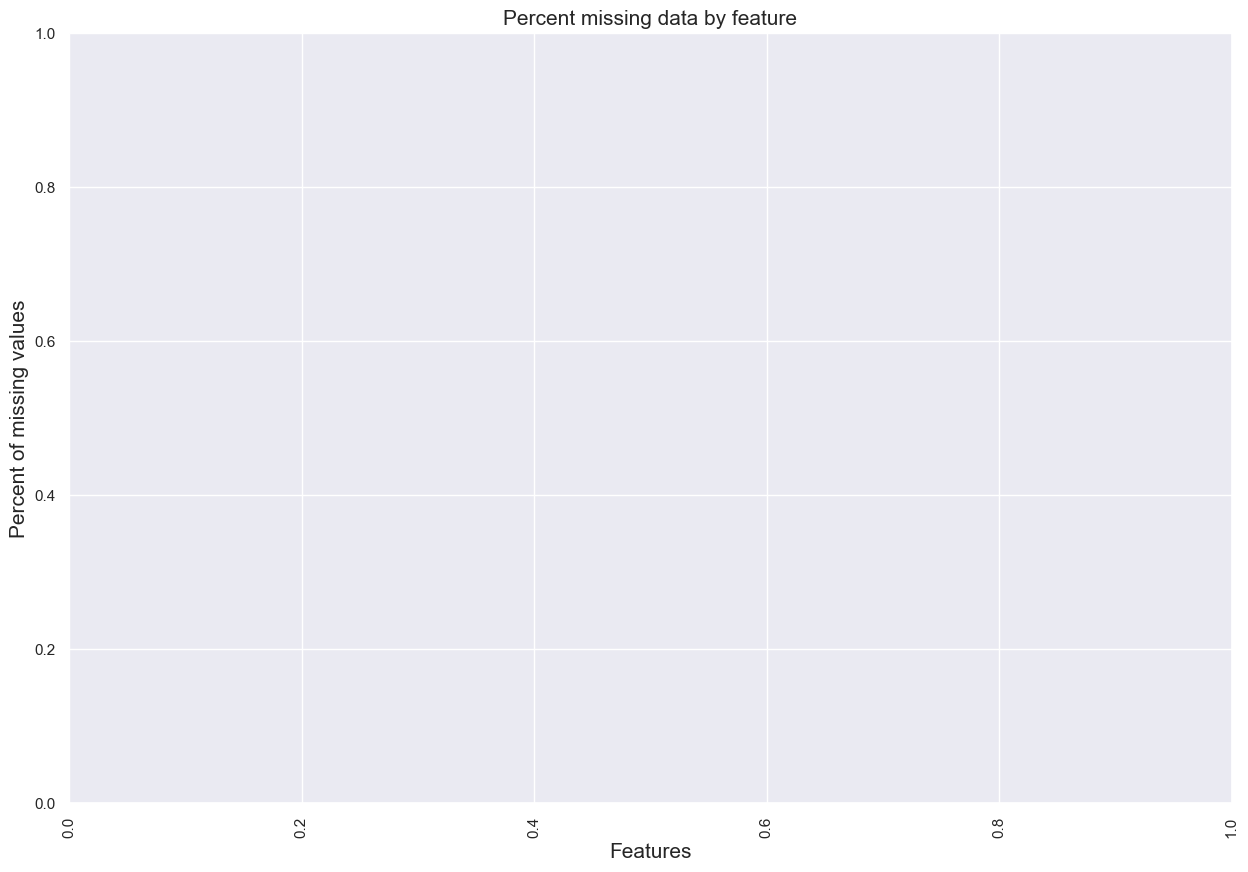

In [30]:
# PLOTTING PERCENT OF NULL VALUES FOR PRICE DATA FRAME

nan_count_price=((price_df.isna().sum()/price_df.shape[0])*100).sort_values(ascending=False)
nan_count_price=nan_count[nan_count>0]
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x= nan_count_price.index,y = nan_count_price.values, df = nan_count_price)
plt.show()

In [31]:
# DUPLICATE ROWS

def duplicate_rows(df):
    dups = df.duplicated().sum()
    return dups

In [34]:
duplicate_rows(client_df),duplicate_rows(price_df)

(0, 0)

In [ ]:
# There are no duplicate data in both data set

# OUTLIER DETECTION

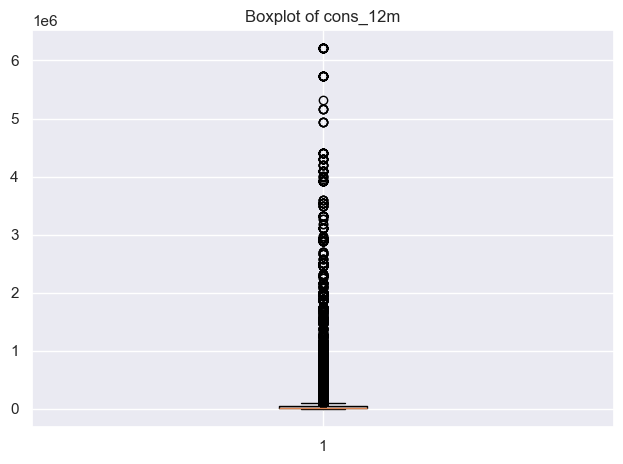

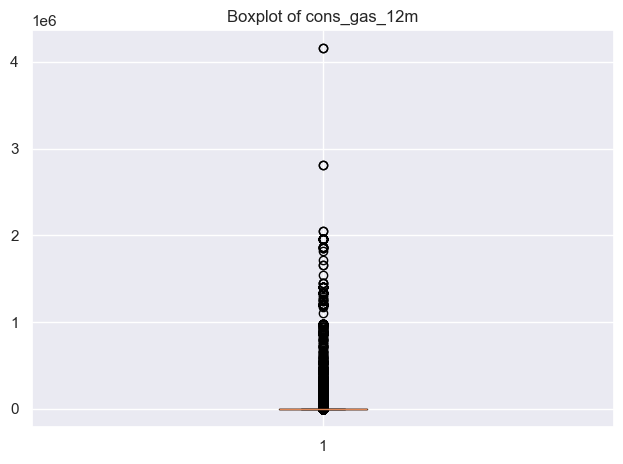

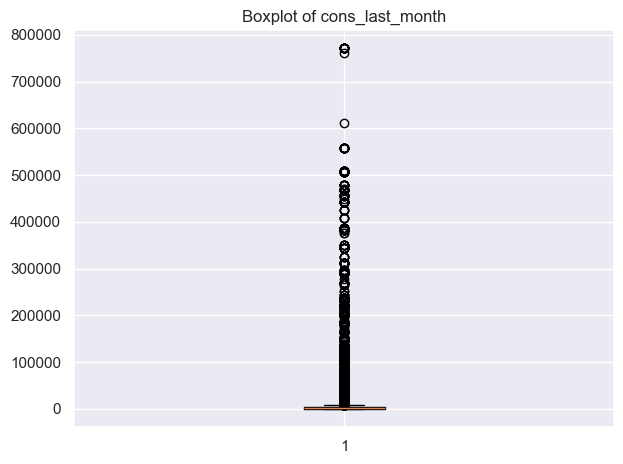

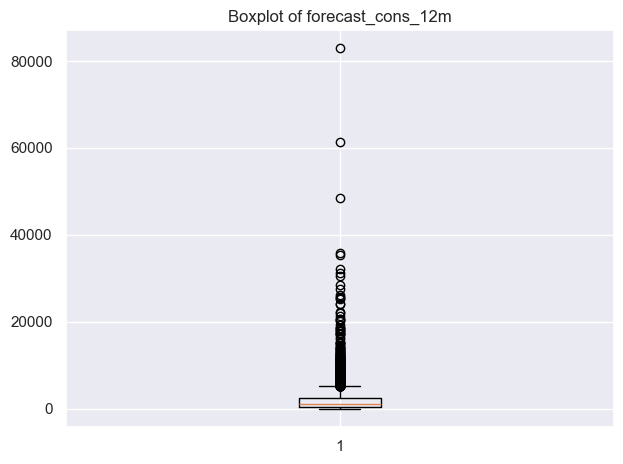

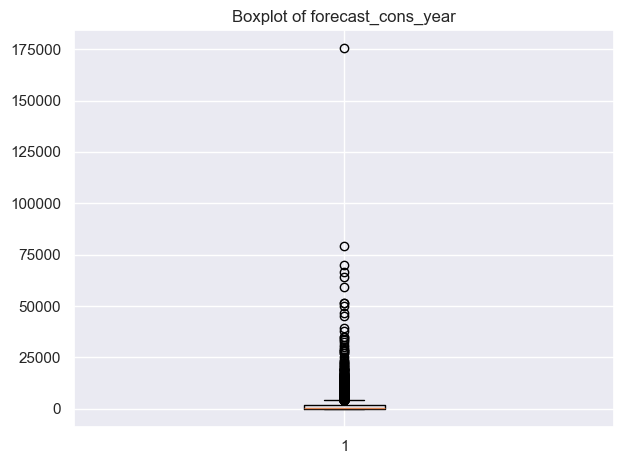

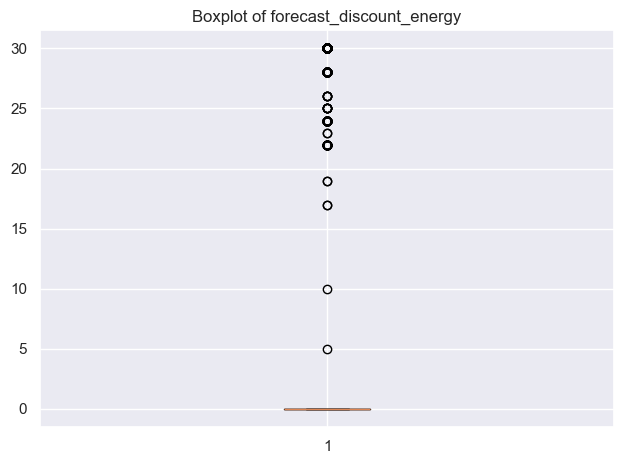

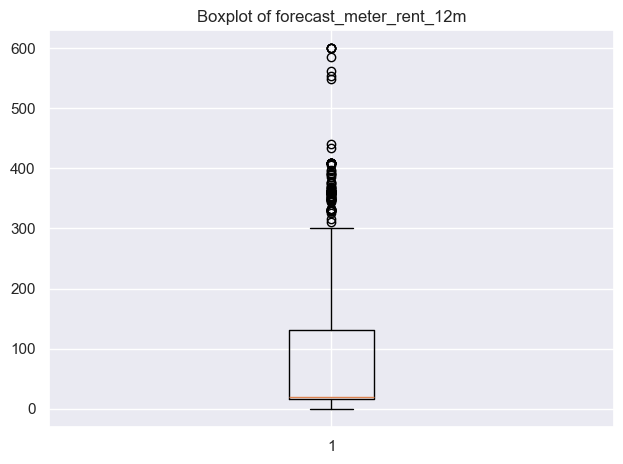

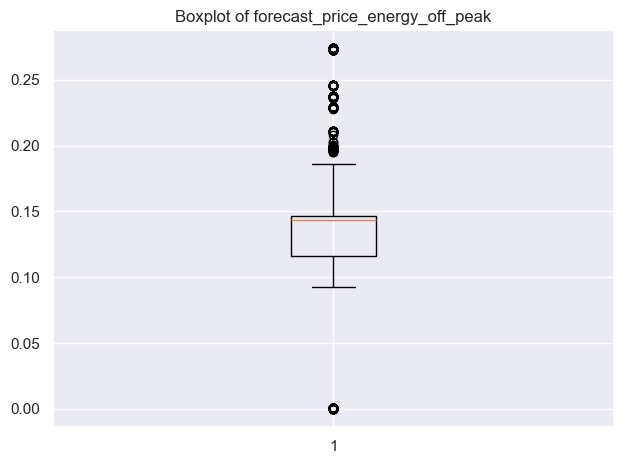

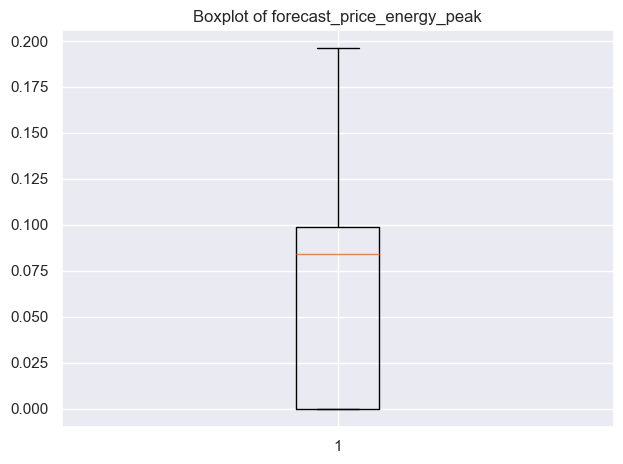

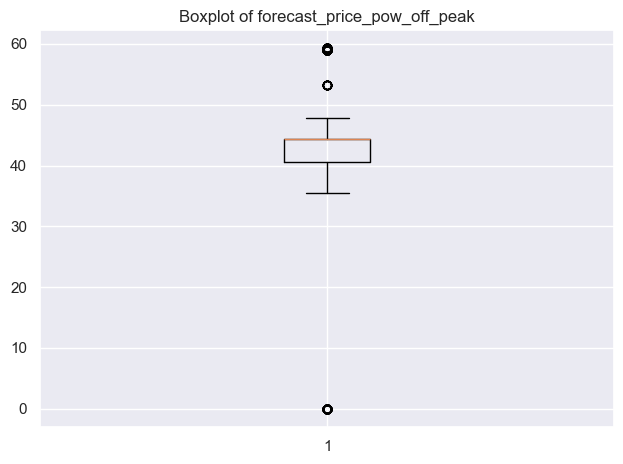

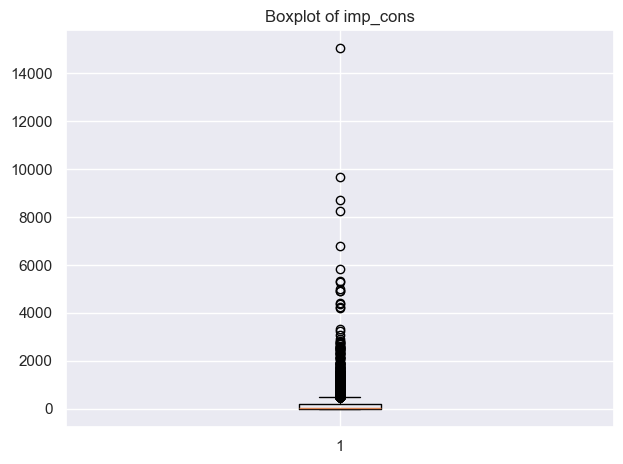

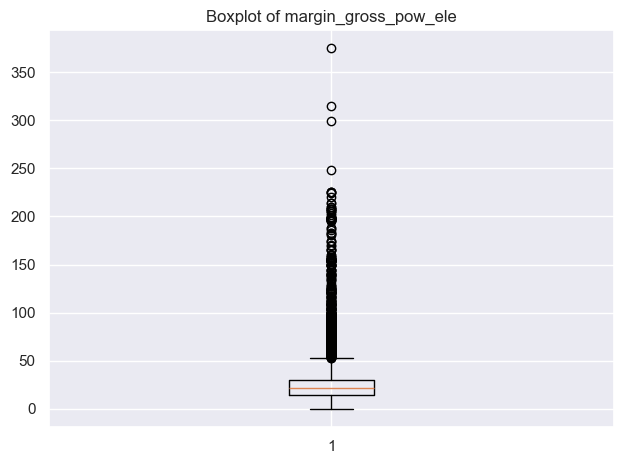

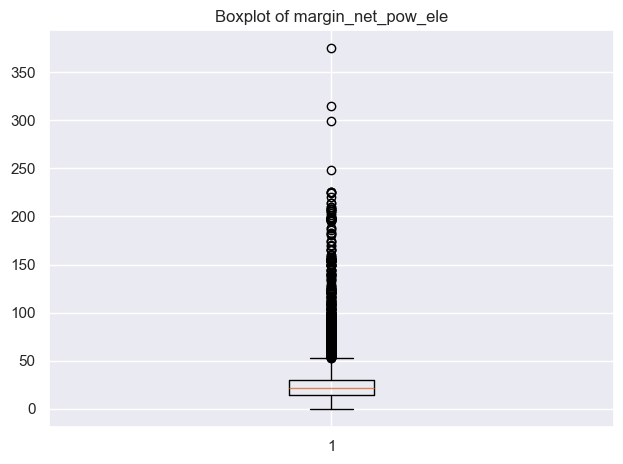

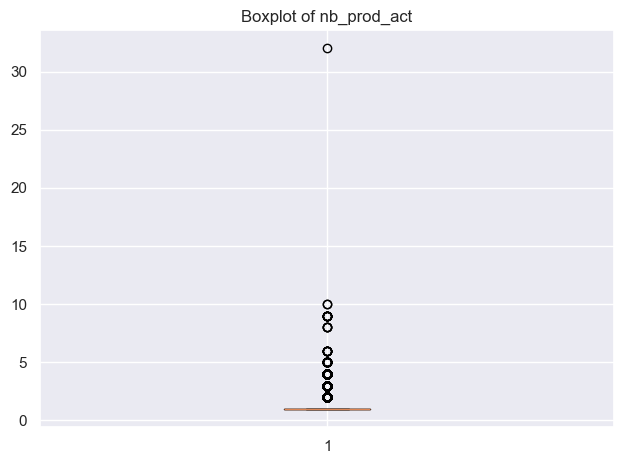

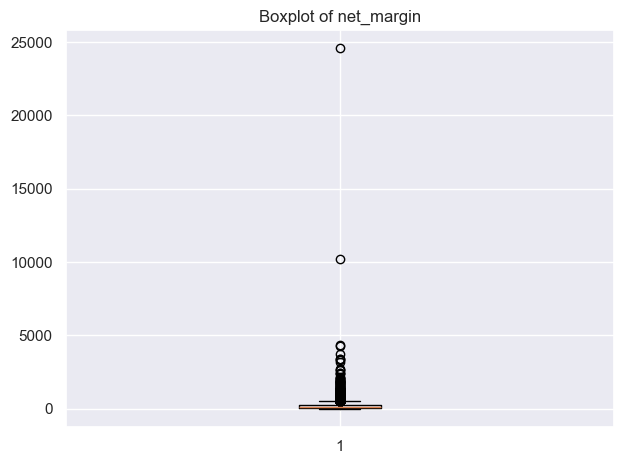

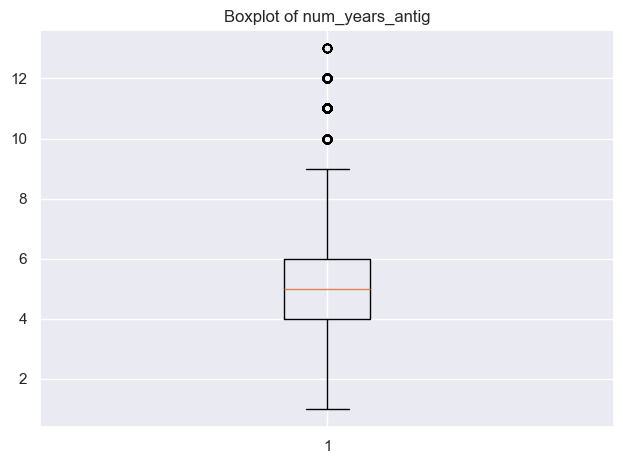

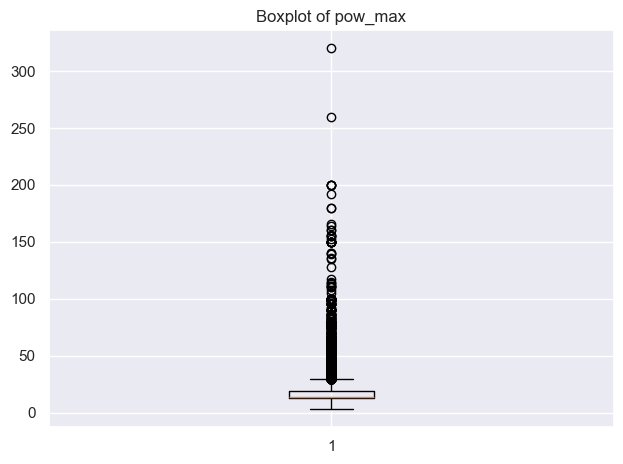

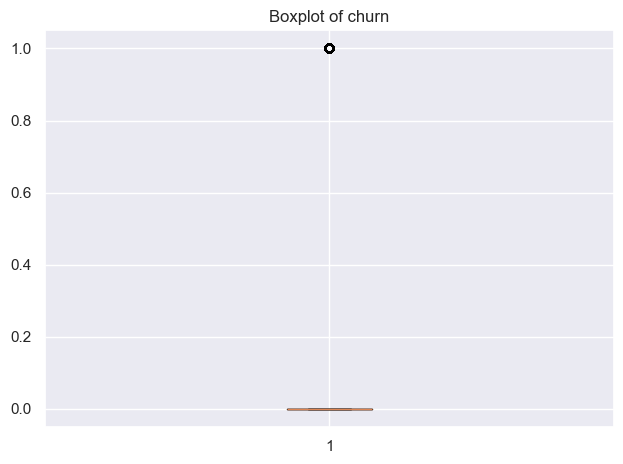

In [81]:
for col in client_df.columns:
    if client_df[col].dtype != "object":
        plt.boxplot(client_df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()
     

# DATA VISUALISATION

# UNIVARIANT ANALYSIS

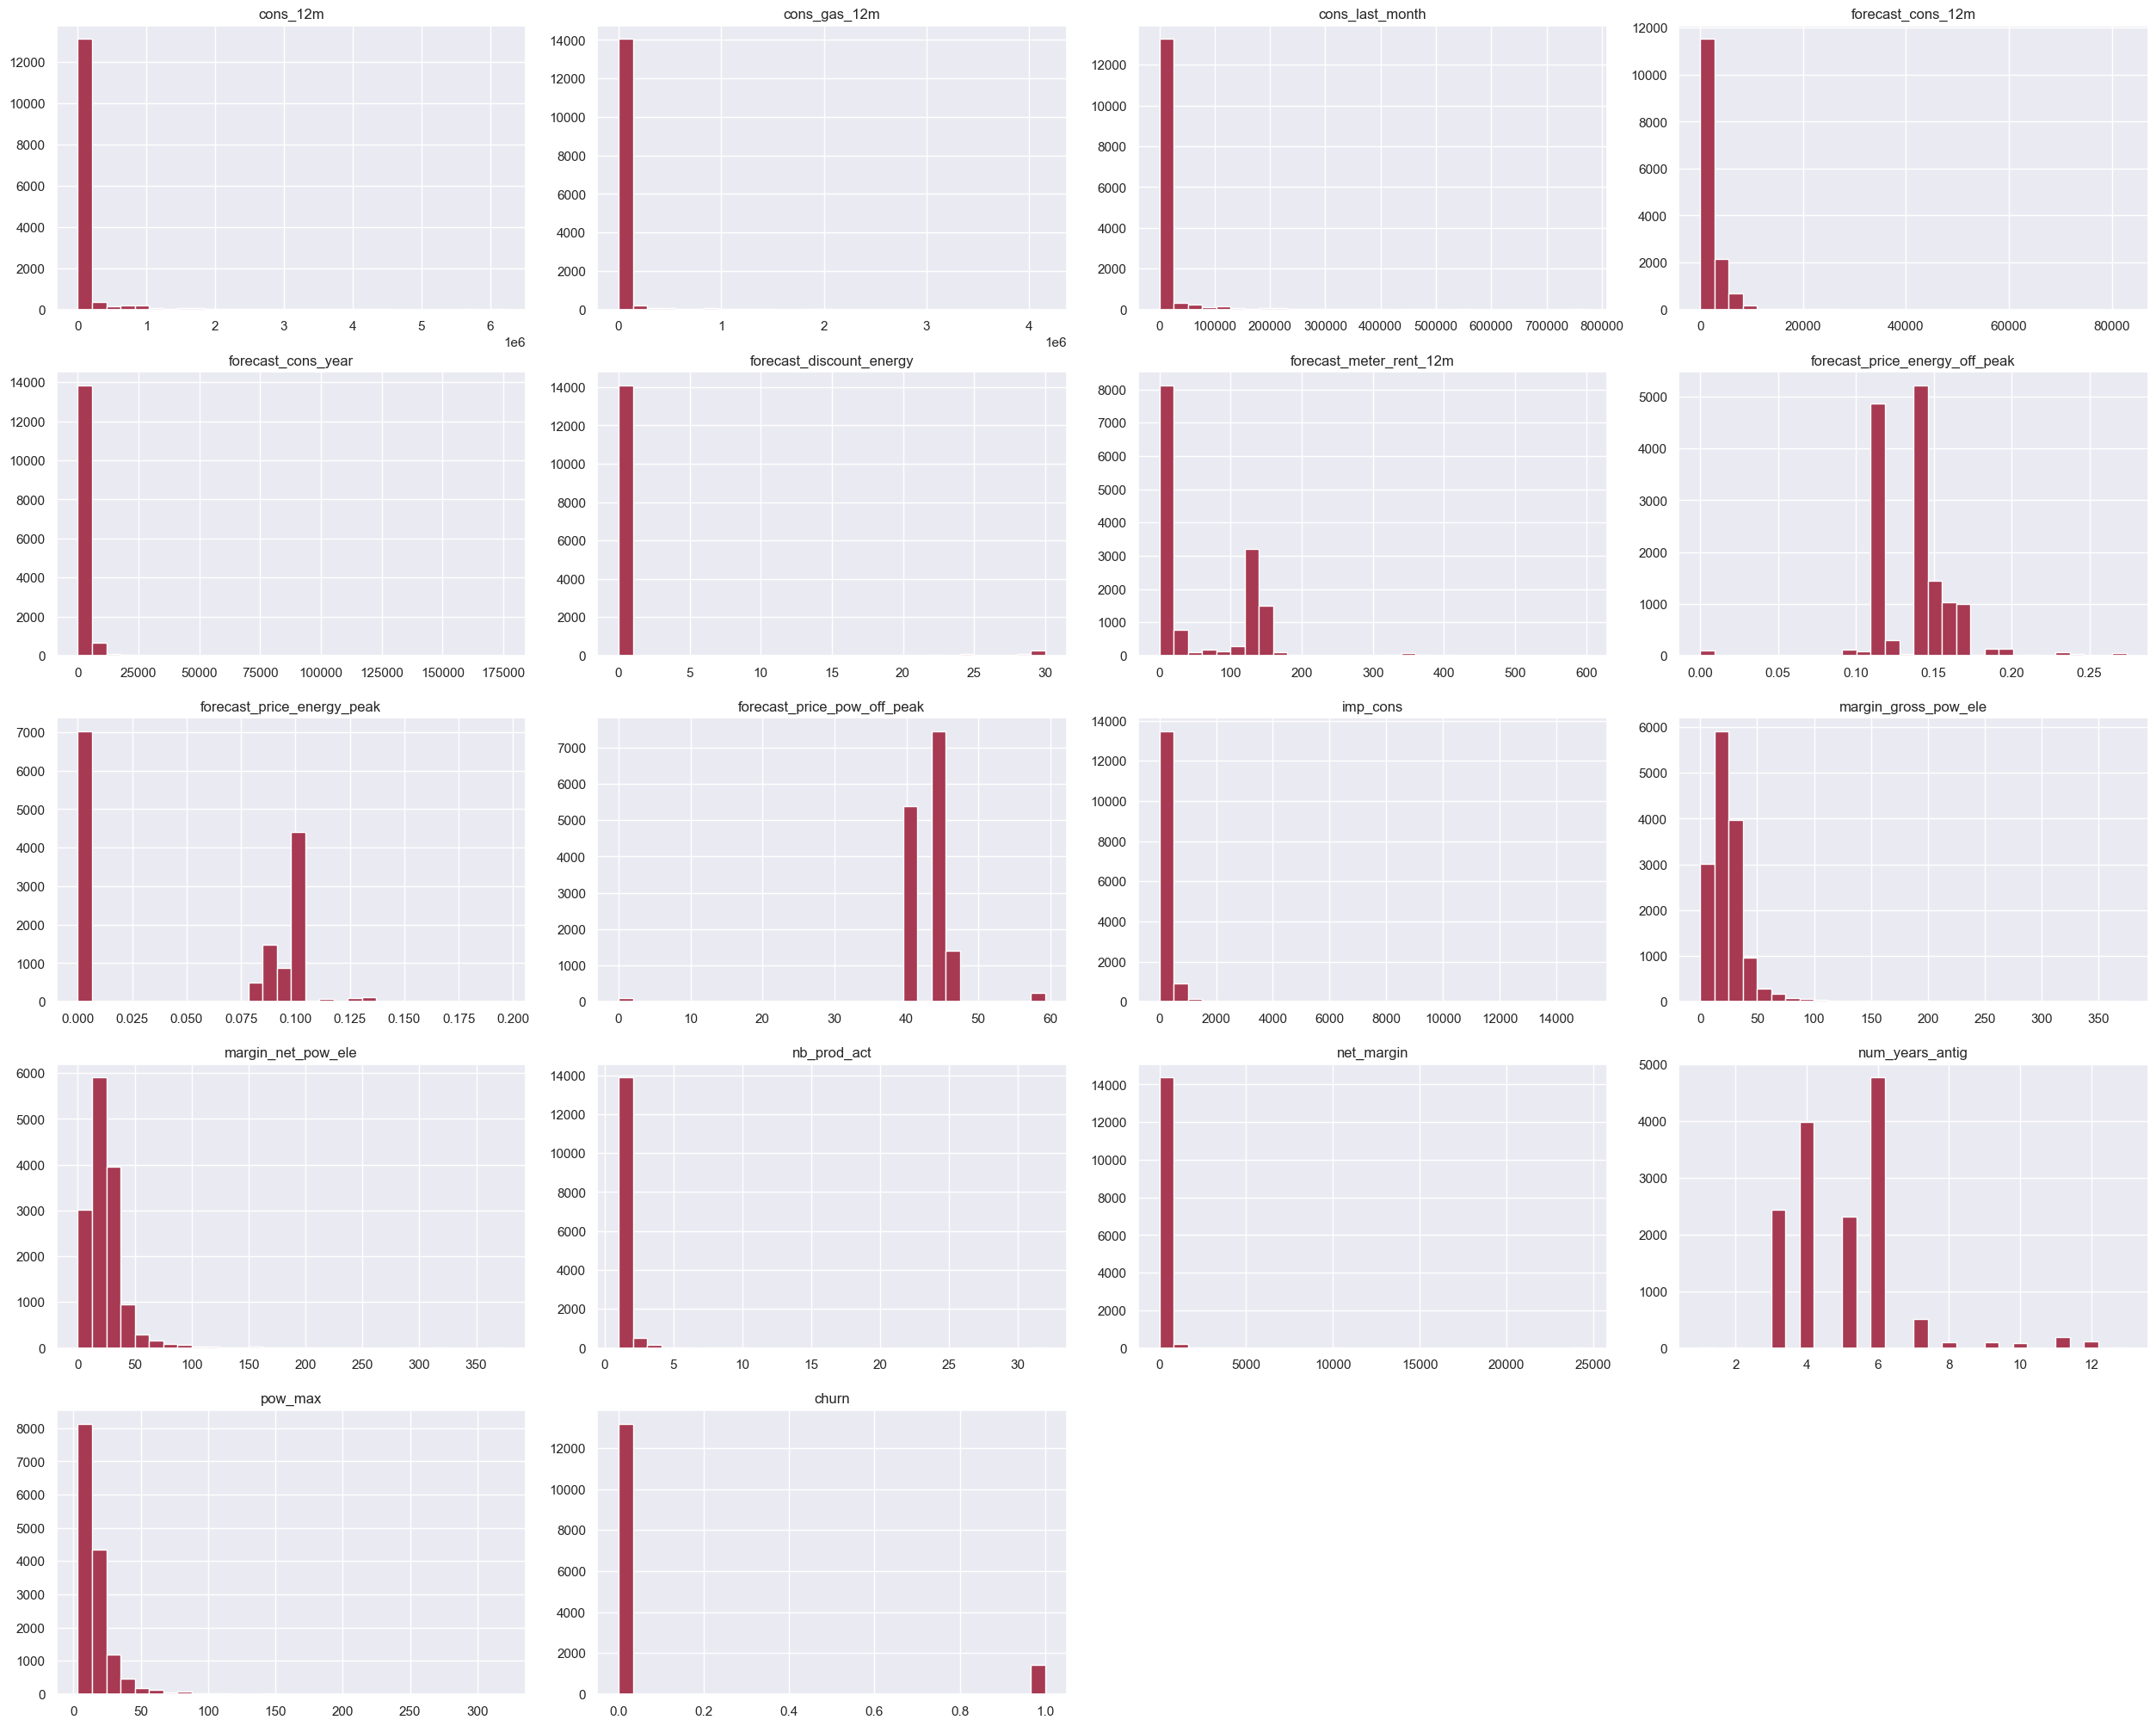

In [75]:
# HISTORGRAM FOR DISTRIBUTION OF FEATURES FOR CLIENT DATASET

client_df.hist(bins = 30, figsize = (25,20), color = '#a73952')
plt.tight_layout(pad = 0.4)
plt.show()

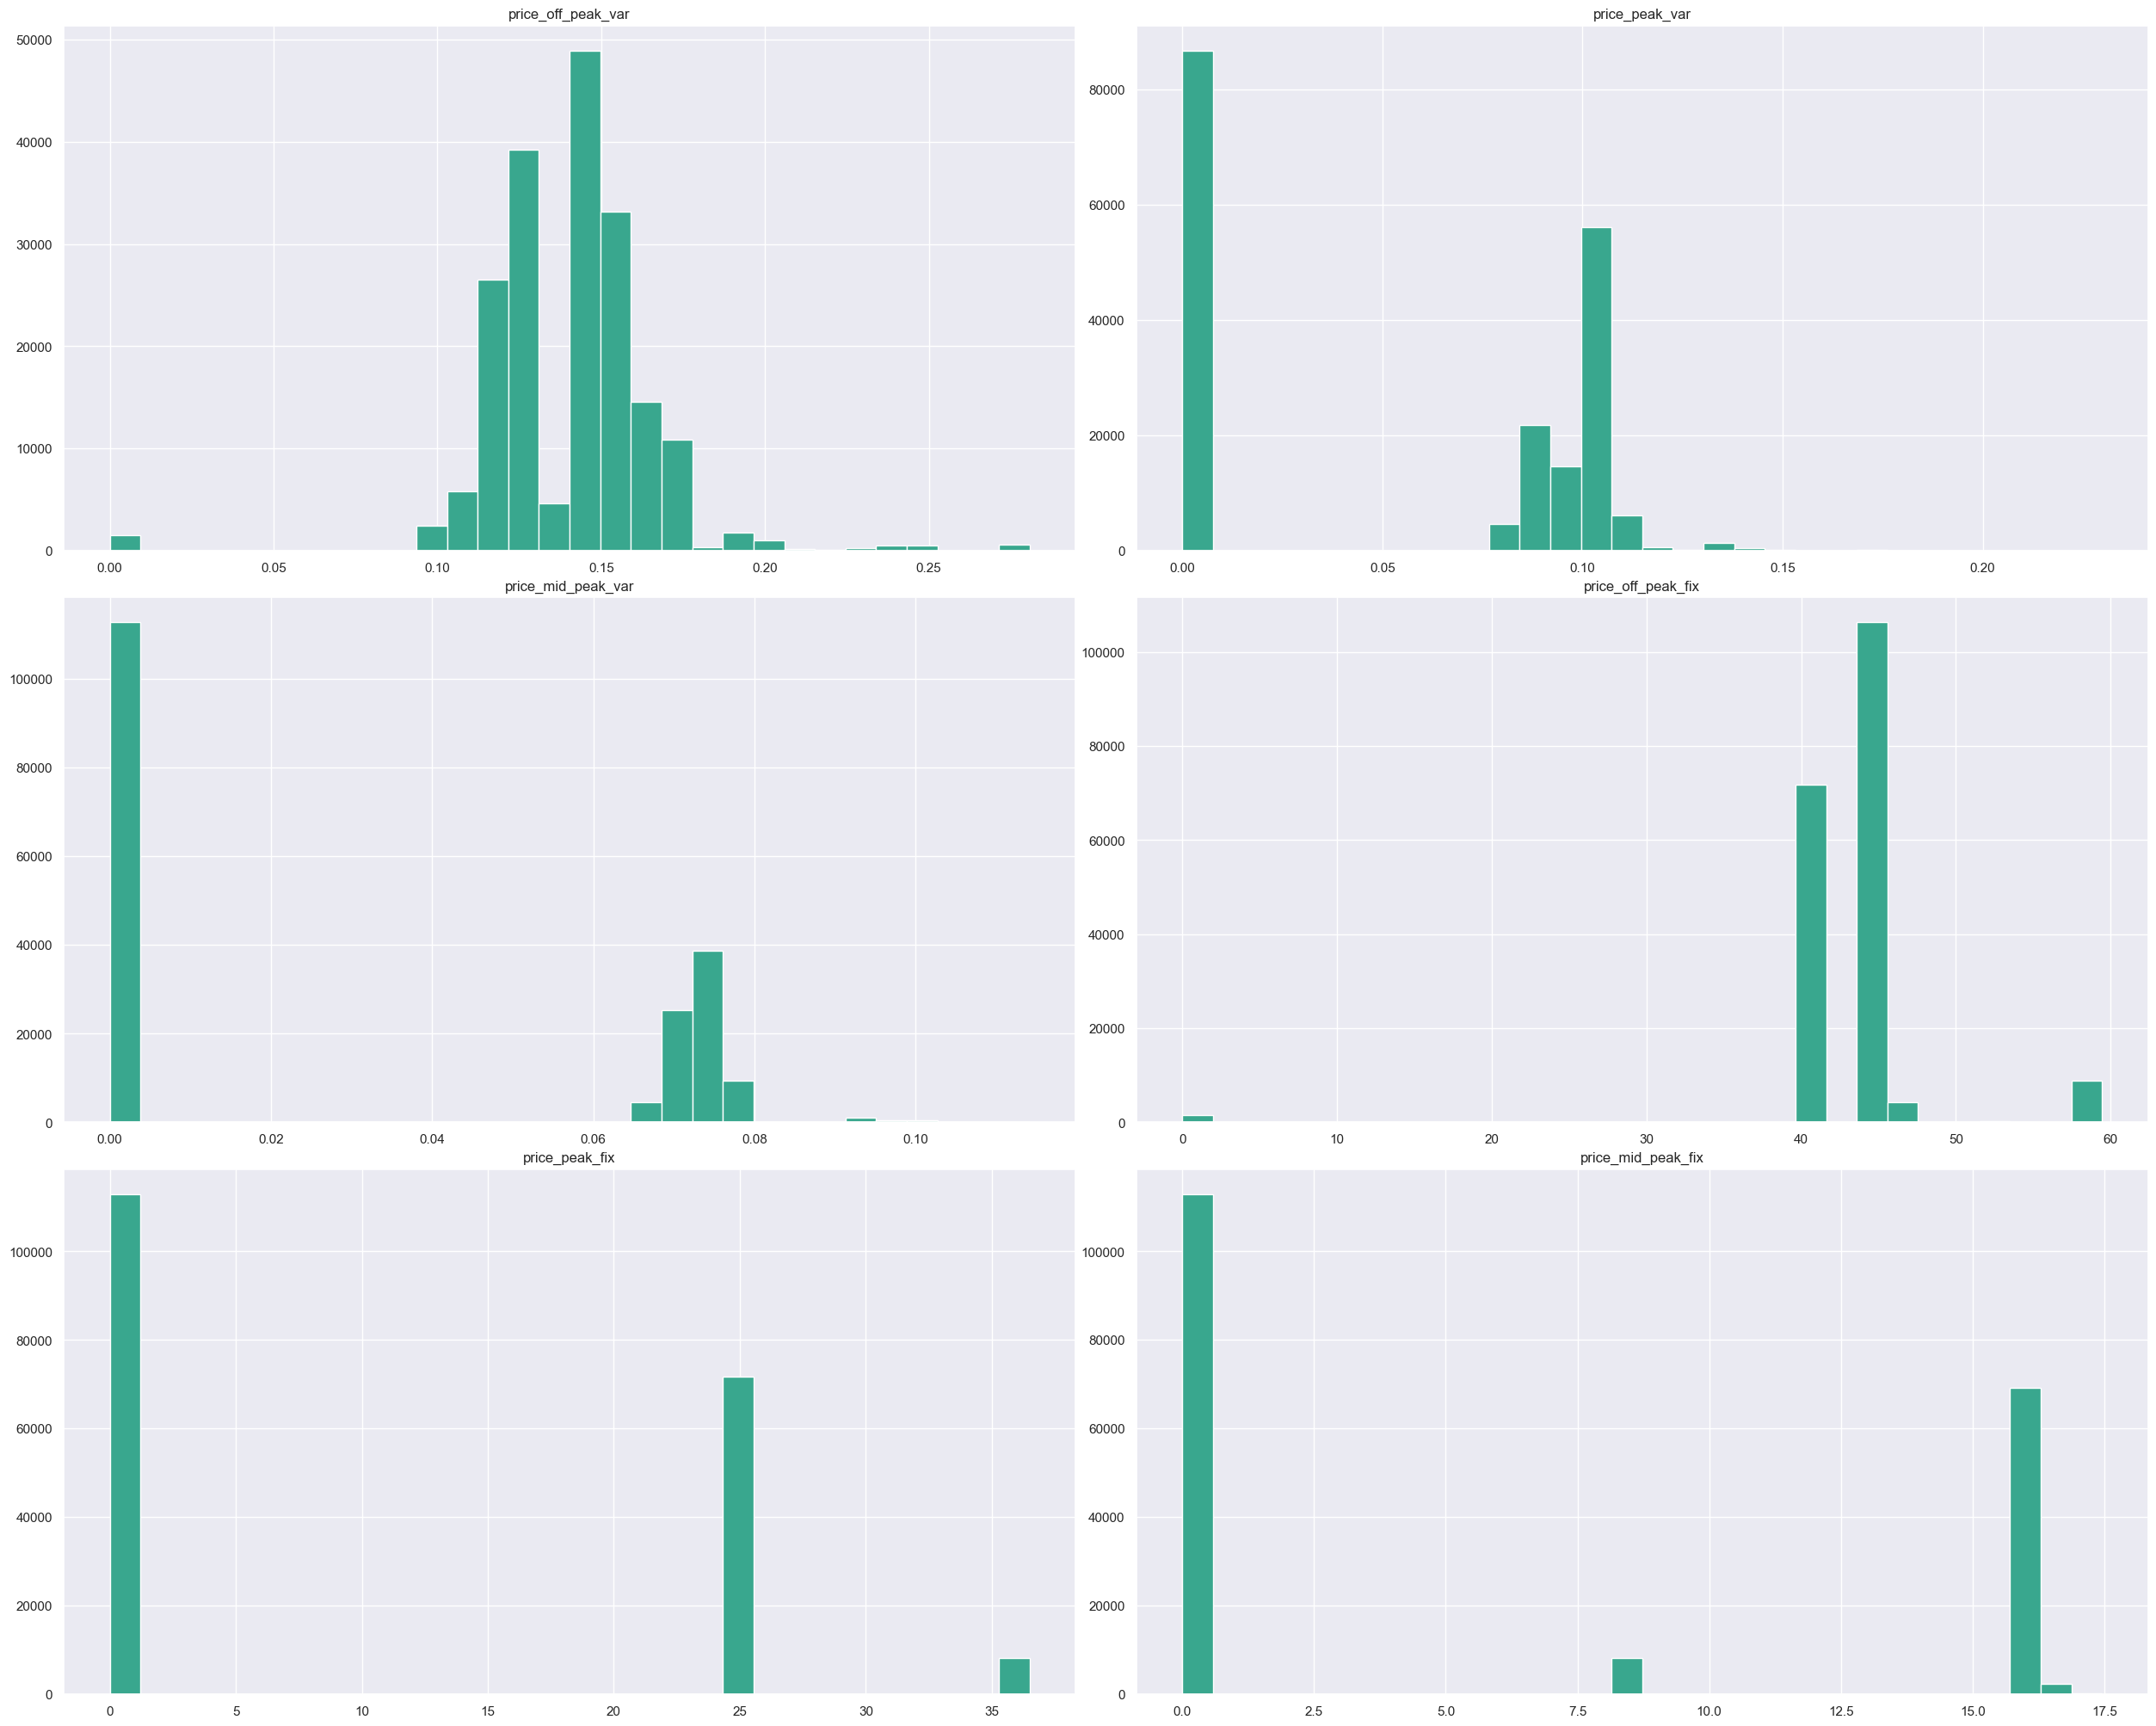

In [76]:
# HISTORGRAM FOR DISTRIBUTION OF FEATURES FOR PRICE DATASET

price_df.hist(bins = 30, figsize = (25,20), color = '#39a78e')
plt.tight_layout(pad = 0.4)
plt.show()

In [ ]:
# Both the histograms show that the data is skewed in both datasets and needs to be addressed 
# before proceeding into model selection

In [83]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [91]:
# MERGING DATA SET

merged_df = client_df.merge(price_df,on='id', how = 'inner')
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [124]:
# ENERGY AND POWER PRICES

churn_price = merged_df[merged_df['churn'] == 1].groupby('price_date').mean('numeric_only')
non_churn_price = merged_df[merged_df['churn'] == 0].groupby('price_date').mean('numeric_only')

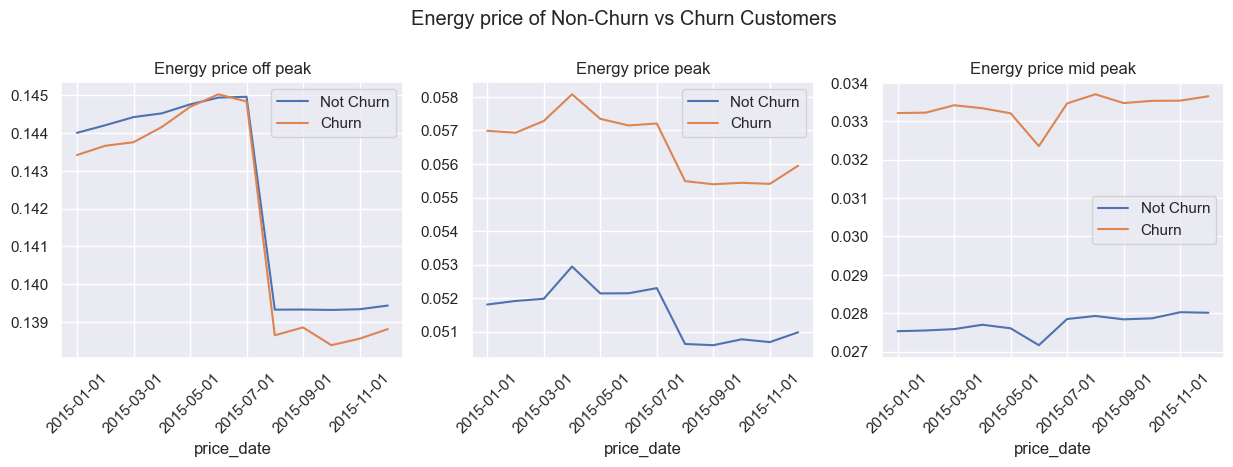

In [125]:
# Energy price off peak
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
non_churn_price.price_off_peak_var.plot()
churn_price.price_off_peak_var.plot()
plt.xticks(rotation = 45)
plt.title("Energy price off peak")
plt.legend(['Not Churn', 'Churn'])
# Energy price off peak
plt.subplot(1,3,2)
non_churn_price.price_peak_var.plot()
churn_price.price_peak_var.plot()
plt.xticks(rotation = 45)
plt.title("Energy price peak")
plt.legend(['Not Churn', 'Churn'])
# Energy price mid peak
plt.subplot(1,3,3)
non_churn_price.price_mid_peak_var.plot()
churn_price.price_mid_peak_var.plot()
plt.xticks(rotation = 45)
plt.title("Energy price mid peak")
plt.legend(['Not Churn', 'Churn'])

plt.suptitle('Energy price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

In [ ]:
# Energy prices are slightly high in peak and mid peak for churned customers than non churned

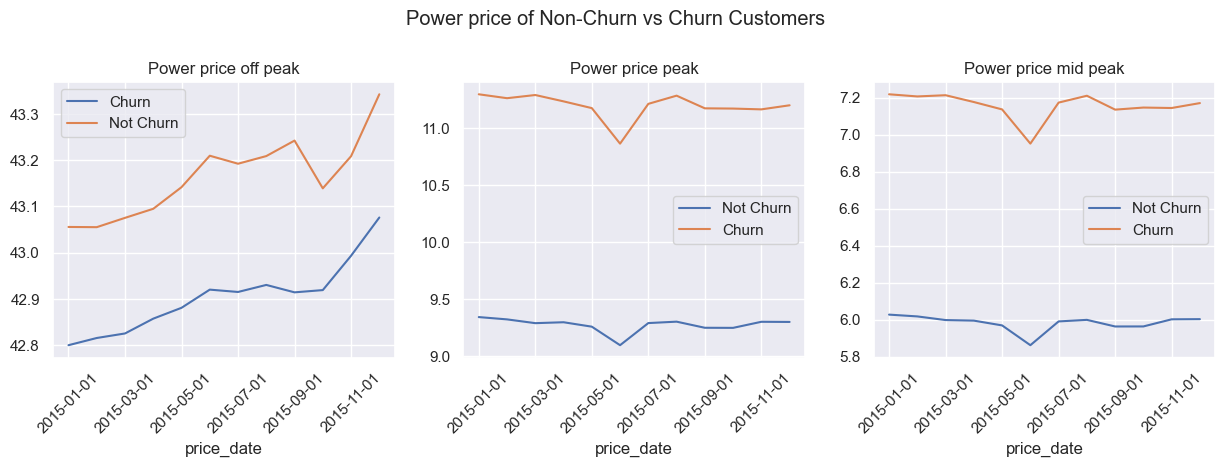

In [126]:
# Energy price off peak
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
non_churn_price.price_off_peak_fix.plot()
churn_price.price_off_peak_fix.plot()
plt.xticks(rotation = 45)
plt.title("Power price off peak")
plt.legend(['Churn', 'Not Churn'])
# Energy price off peak
plt.subplot(1,3,2)
non_churn_price.price_peak_fix.plot()
churn_price.price_peak_fix.plot()
plt.xticks(rotation = 45)
plt.title("Power price peak")
plt.legend(['Not Churn', 'Churn'])
# Energy price mid peak
plt.subplot(1,3,3)
non_churn_price.price_mid_peak_fix.plot()
churn_price.price_mid_peak_fix.plot()
plt.xticks(rotation = 45)
plt.title("Power price mid peak")
plt.legend(['Not Churn', 'Churn'])

plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

In [ ]:
# Power prices are high for churned customers over peak, non peak and mid peak

In [ ]:
# CREATED USER DEFINED FUNCTIONS

In [254]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

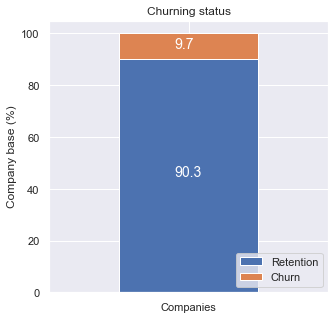

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

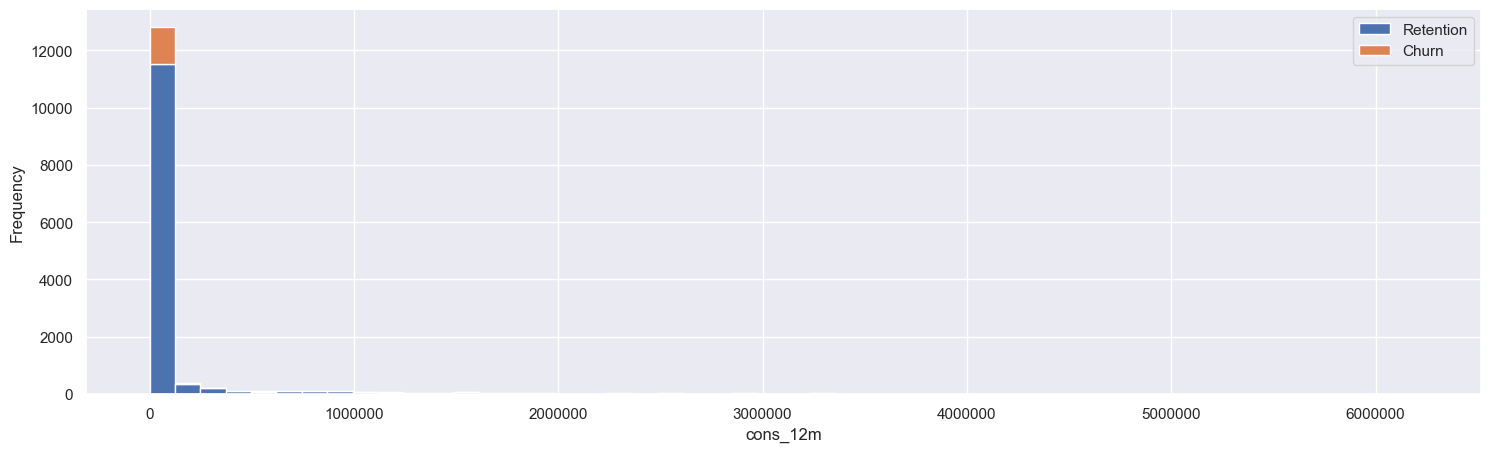

In [261]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'cons_12m', axs)



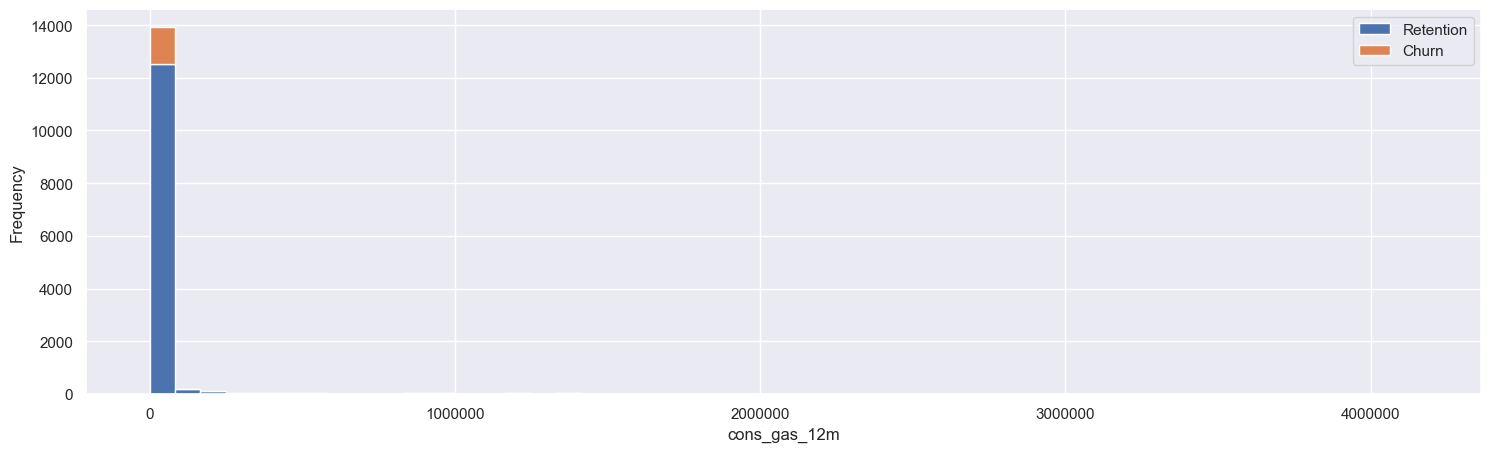

In [262]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'cons_gas_12m', axs)
# plot_distribution(consumption, 'cons_last_month', axs)
# plot_distribution(consumption, 'imp_cons', axs)
# plot_distribution(consumption, 'churn', axs)

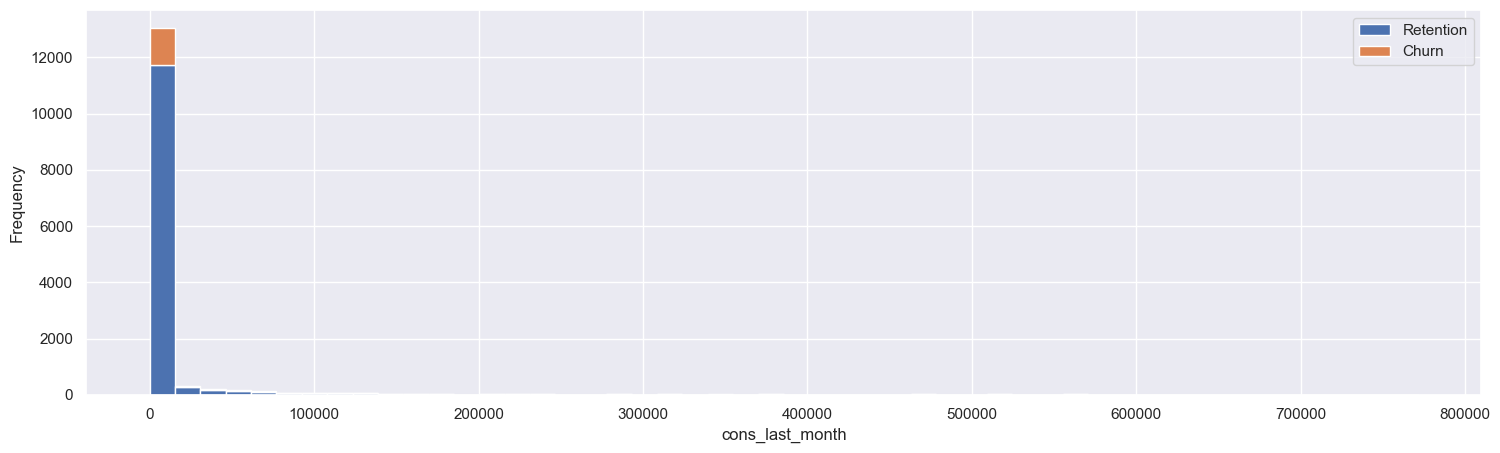

In [263]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_last_month', axs)
# plot_distribution(consumption, 'imp_cons', axs)
# plot_distribution(consumption, 'churn', axs)

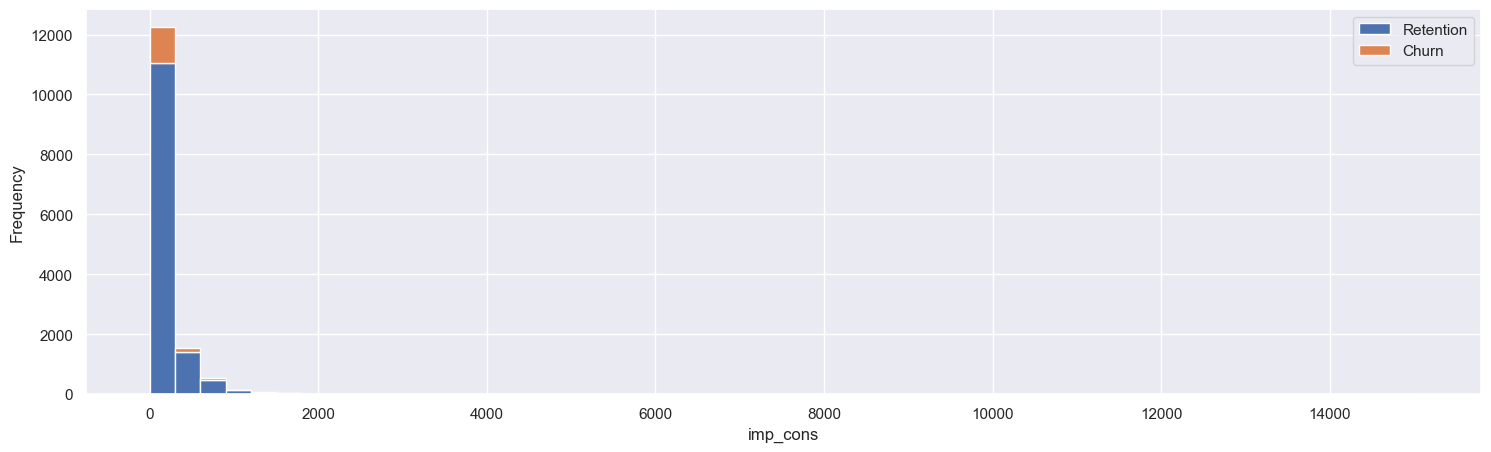

In [264]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'imp_cons', axs)
# plot_distribution(consumption, 'churn', axs)

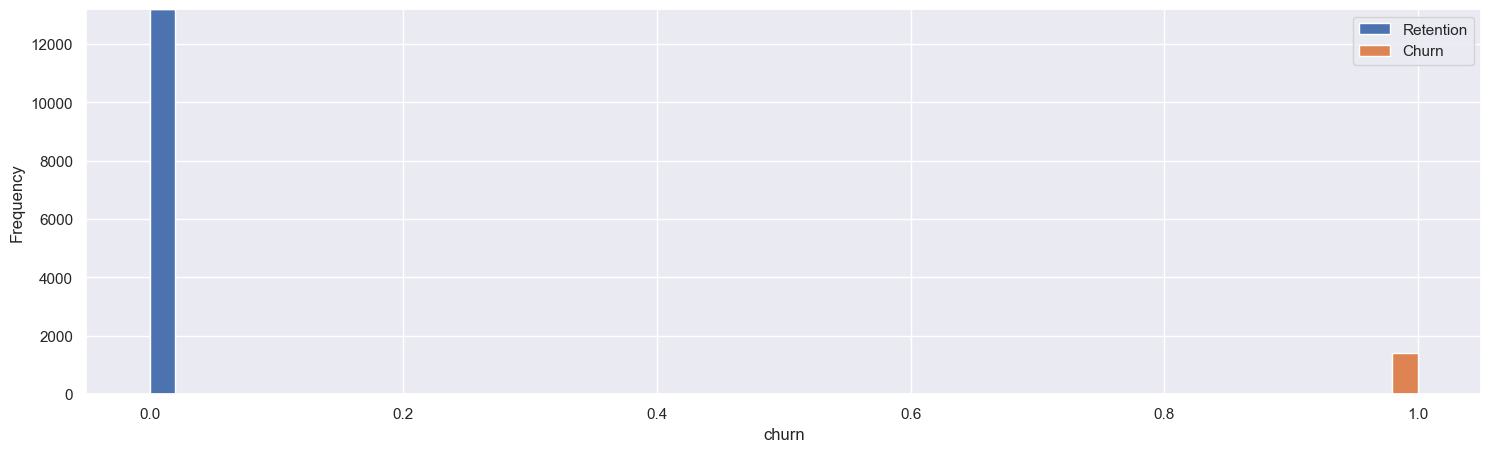

In [265]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'churn', axs)

In [127]:
churn = client_df[['id', 'churn']]
churn

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0
...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0
14602,d0a6f71671571ed83b2645d23af6de00,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0


In [131]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


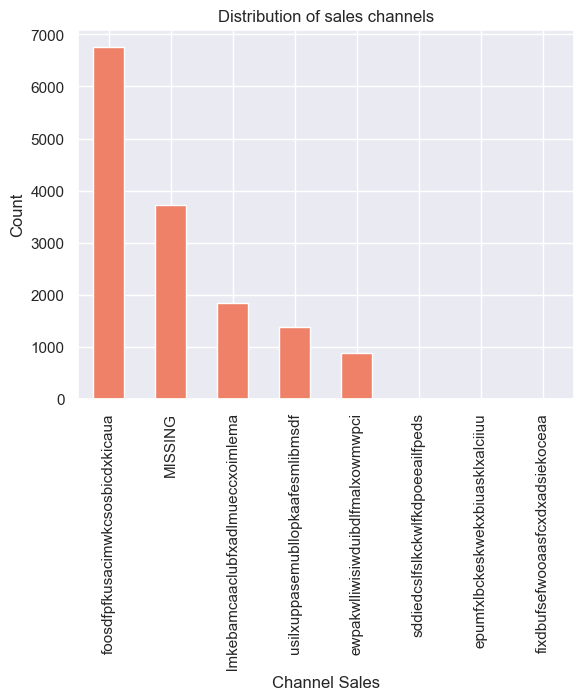

In [140]:
# UNIVARIATE ANALYSIS OF SALES CHANNEL

client_df['channel_sales'].value_counts().plot(kind = 'bar', color = '#ee8168')
plt.title("Distribution of sales channels")
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.show()


In [141]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


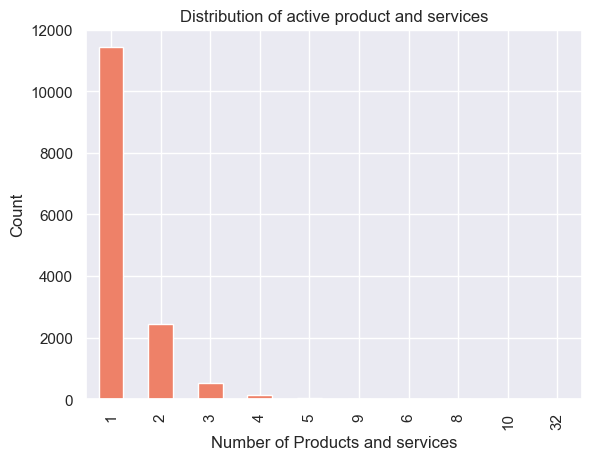

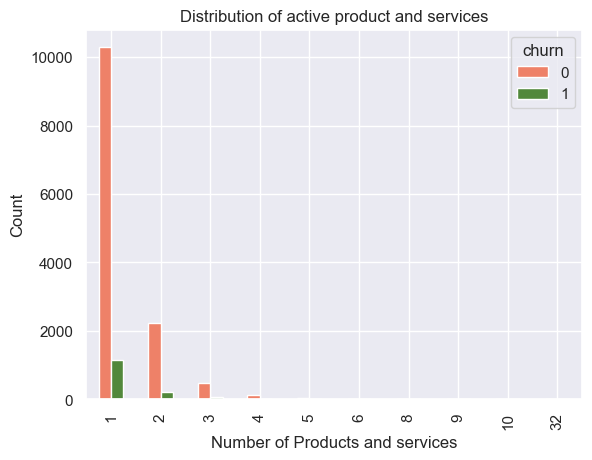

In [175]:
# UNIVARIATE AND BIVARIATE ANALYSIS OF ACTIVE PRODUCTS

client_df['nb_prod_act'].value_counts().plot(kind = 'bar', color = '#ee8168')
plt.title("Distribution of active product and services")
plt.xlabel('Number of Products and services')
plt.ylabel('Count')
plt.show()

active_pro = client_df.groupby(['churn'])['nb_prod_act'].value_counts().unstack()
active_pro.T.plot(kind = 'bar', color = ['#ee8168','#52883b'])
plt.title("Distribution of active product and services")
plt.xlabel('Number of Products and services')
plt.ylabel('Count')
plt.show()


# INSIGHTS
# 78% of clients had only one product or service
# 16% of clients subscribed to two services
# 4% of clients subscribed to three services

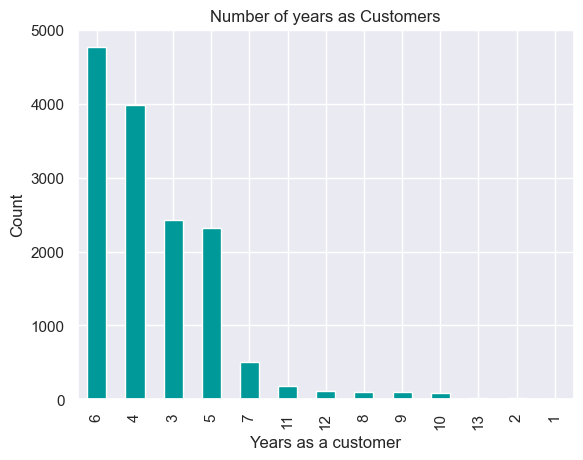

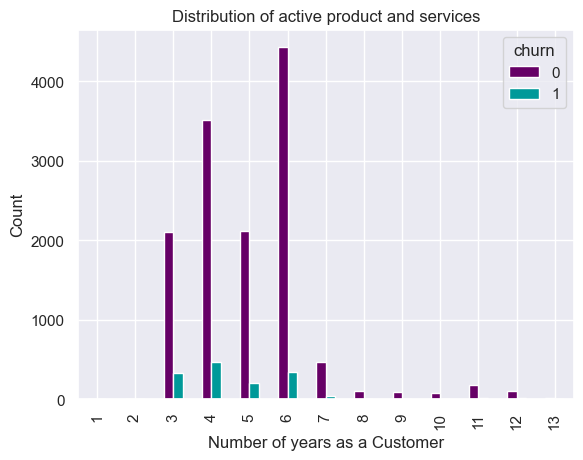

1.0

In [172]:

client_df['num_years_antig'].value_counts().plot(kind = 'bar', color = '#009999')
plt.title("Number of years as Customers")
plt.xlabel('Years as a customer')
plt.ylabel('Count')
plt.show()

active_pro = client_df.groupby(['churn'])['num_years_antig'].value_counts().unstack()
active_pro.T.plot(kind = 'bar', color = ['#660066','#009999'])
plt.title("Distribution of active product and services")
plt.xlabel('Number of years as a Customer')
plt.ylabel('Count')
plt.show()

# INSIGHTS
# 1. Customers who spent 6 years formed the largest pool 
# 2. This was followed by 4,3 and 5 years 
# 3. Customers with one and two year are the smallest pool
# 4. Attrition rate is higher in customers who have been around for 12 years
# 5. Customers for 4 years, have higher attrition rate than 3,5 and 6 years

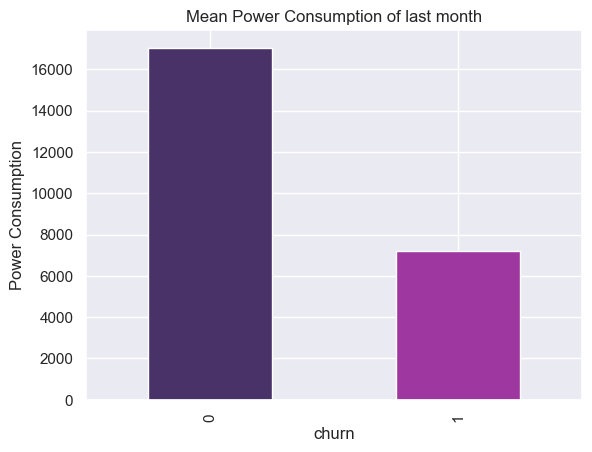

In [191]:
# MEAN POWER CONSUMPTION OF LAST MONTH
client_df.groupby('churn')['cons_last_month'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])
plt.title("Mean Power Consumption of last month")
plt.ylabel("Power Consumption")
plt.show()

# Mean power consumption of customers is very high for non churning than churning customers

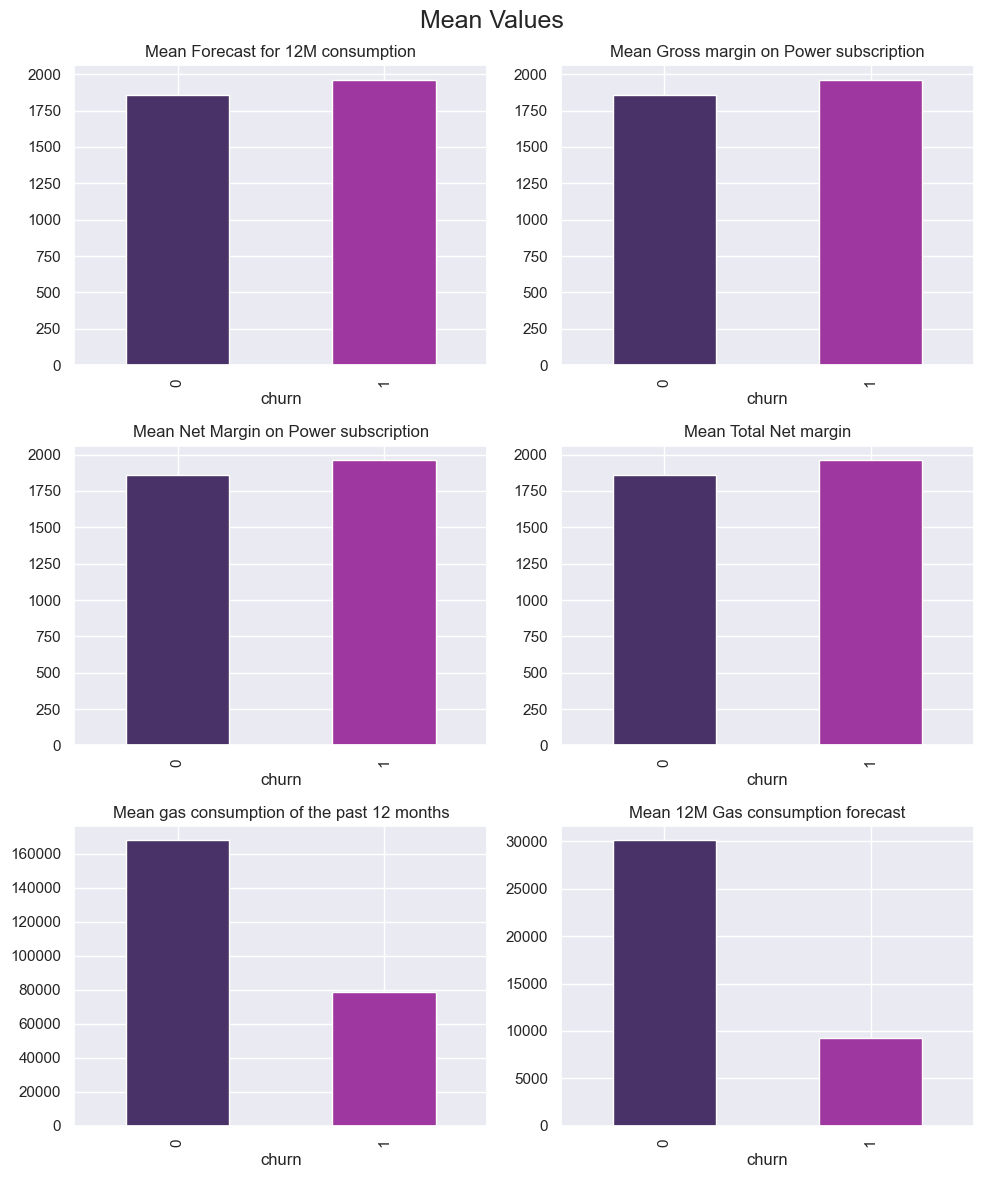

In [233]:
fig = plt.figure(figsize = (10,12))
plt.suptitle("Mean Values", fontsize = 18)

#  subplot #1
plt.subplot(321)
plt.title('Mean Forecast for 12M consumption')
client_df.groupby('churn')['forecast_cons_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])

#  subplot #2
plt.subplot(322)
plt.title('Mean Gross margin on Power subscription')
client_df.groupby('churn')['forecast_cons_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])

#  subplot #3
plt.subplot(323)
plt.title('Mean Net Margin on Power subscription')
client_df.groupby('churn')['forecast_cons_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])

#  subplot #4
plt.subplot(324)
plt.title('Mean Total Net margin')
client_df.groupby('churn')['forecast_cons_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])

#  subplot #5
plt.subplot(325)
plt.title('Mean gas consumption of the past 12 months')
client_df.groupby('churn')['cons_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])


#  subplot #6
plt.subplot(326)
plt.title('Mean 12M Gas consumption forecast')
client_df.groupby('churn')['cons_gas_12m'].mean().plot(kind = 'bar', color = ['#493267','#9e379f'])

plt.tight_layout()
plt.show()

# INSIGHTS

# 1. Mean forecast for 12M consumption was high in churning clients which could be possible reason to look
# for alternatives
# 2. Gross, Net and Total Margins on their subscriptions are higher than non churning customres indicating
# there could be a price sensitivity involved 
# 3. Past 12M gas and electricity consumption has been lower with churning customers

In [232]:

client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


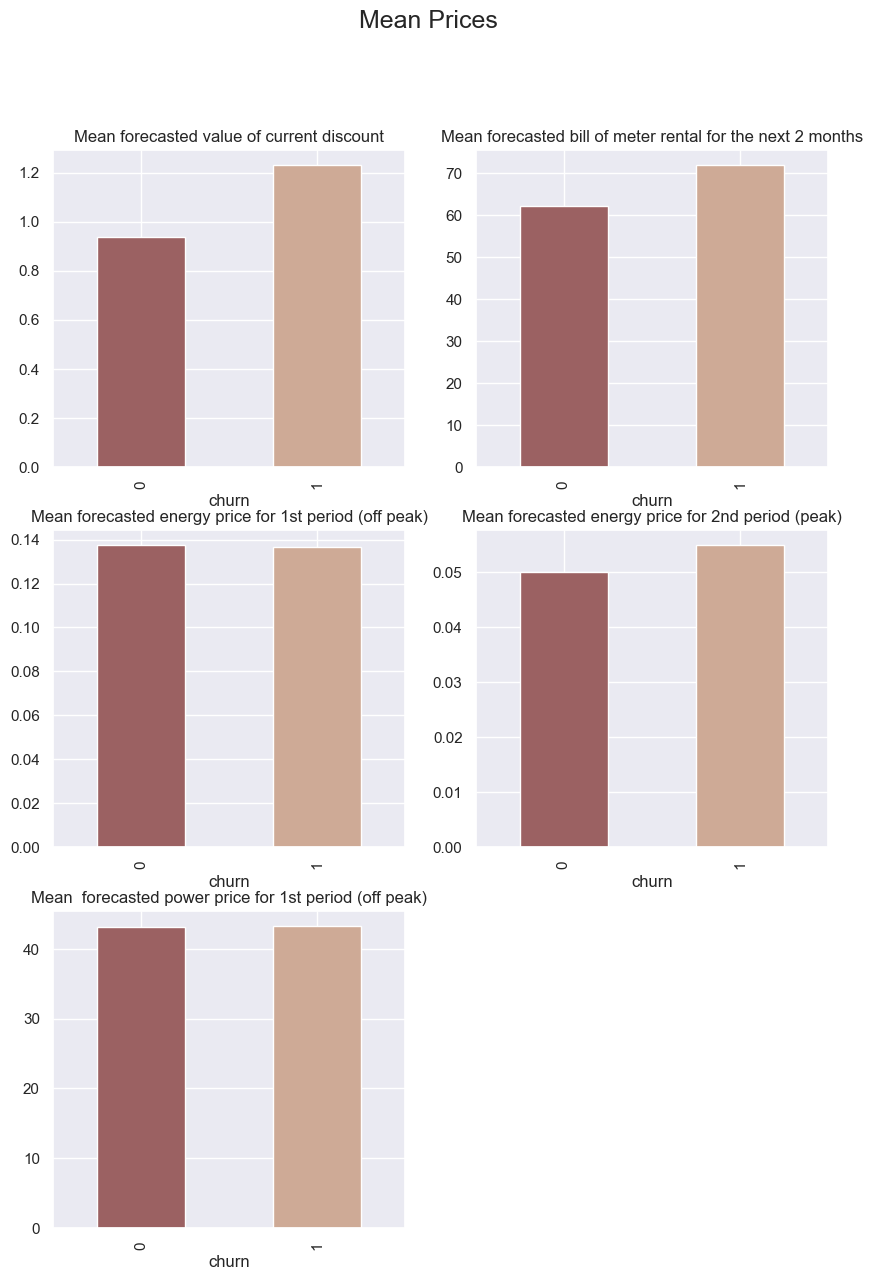

In [243]:
# PRICE SENSITIVITY TO CHURN

fig = plt.figure(figsize = (10,14))
plt.suptitle("Mean Prices", fontsize = 18)

#  subplot #1
plt.subplot(321)
plt.title('Mean forecasted value of current discount')
client_df.groupby('churn')['forecast_discount_energy'].mean().plot(kind = 'bar', color = ['#9b6162','#ceaa96'])

#  subplot #2
plt.subplot(322)
plt.title('Mean forecasted bill of meter rental for the next 2 months')
client_df.groupby('churn')['forecast_meter_rent_12m'].mean().plot(kind = 'bar', color = ['#9b6162','#ceaa96'])


#  subplot #3
plt.subplot(323)
plt.title('Mean forecasted energy price for 1st period (off peak)')
client_df.groupby('churn')['forecast_price_energy_off_peak'].mean().plot(kind = 'bar', color = ['#9b6162','#ceaa96'])


#  subplot #4
plt.subplot(324)
plt.title('Mean forecasted energy price for 2nd period (peak)')
client_df.groupby('churn')['forecast_price_energy_peak'].mean().plot(kind = 'bar', color = ['#9b6162','#ceaa96'])

#  subplot #5
plt.subplot(325)
plt.title('Mean  forecasted power price for 1st period (off peak)')
client_df.groupby('churn')['forecast_price_pow_off_peak'].mean().plot(kind = 'bar', color = ['#9b6162','#ceaa96'])

plt.show()


# INSIGHTS

# 1. There is no difference between churn or non churun during forecasting of energy and electricity for off peak perios
# 2. There is an increase in energy prices during peak in churn group
# 3. There is also higher price wfor the meter rental in churn groups


In [244]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


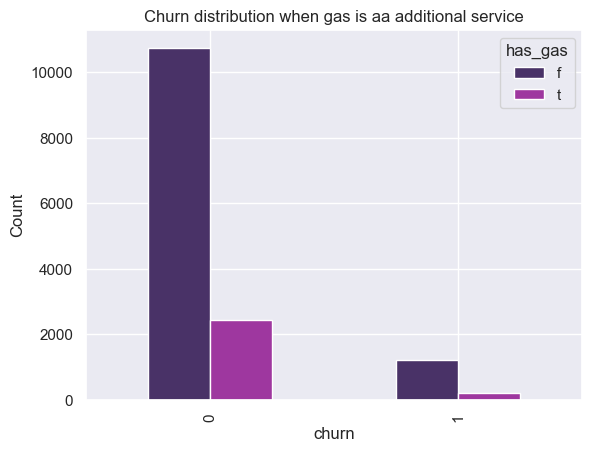

In [252]:
#Has gas as a service or not
client_df.groupby('churn')['has_gas'].value_counts().unstack().plot(kind = 'bar', color = ['#493267','#9e379f'])
plt.title("Churn distribution when gas is aa additional service")
plt.ylabel("Count")
plt.show()

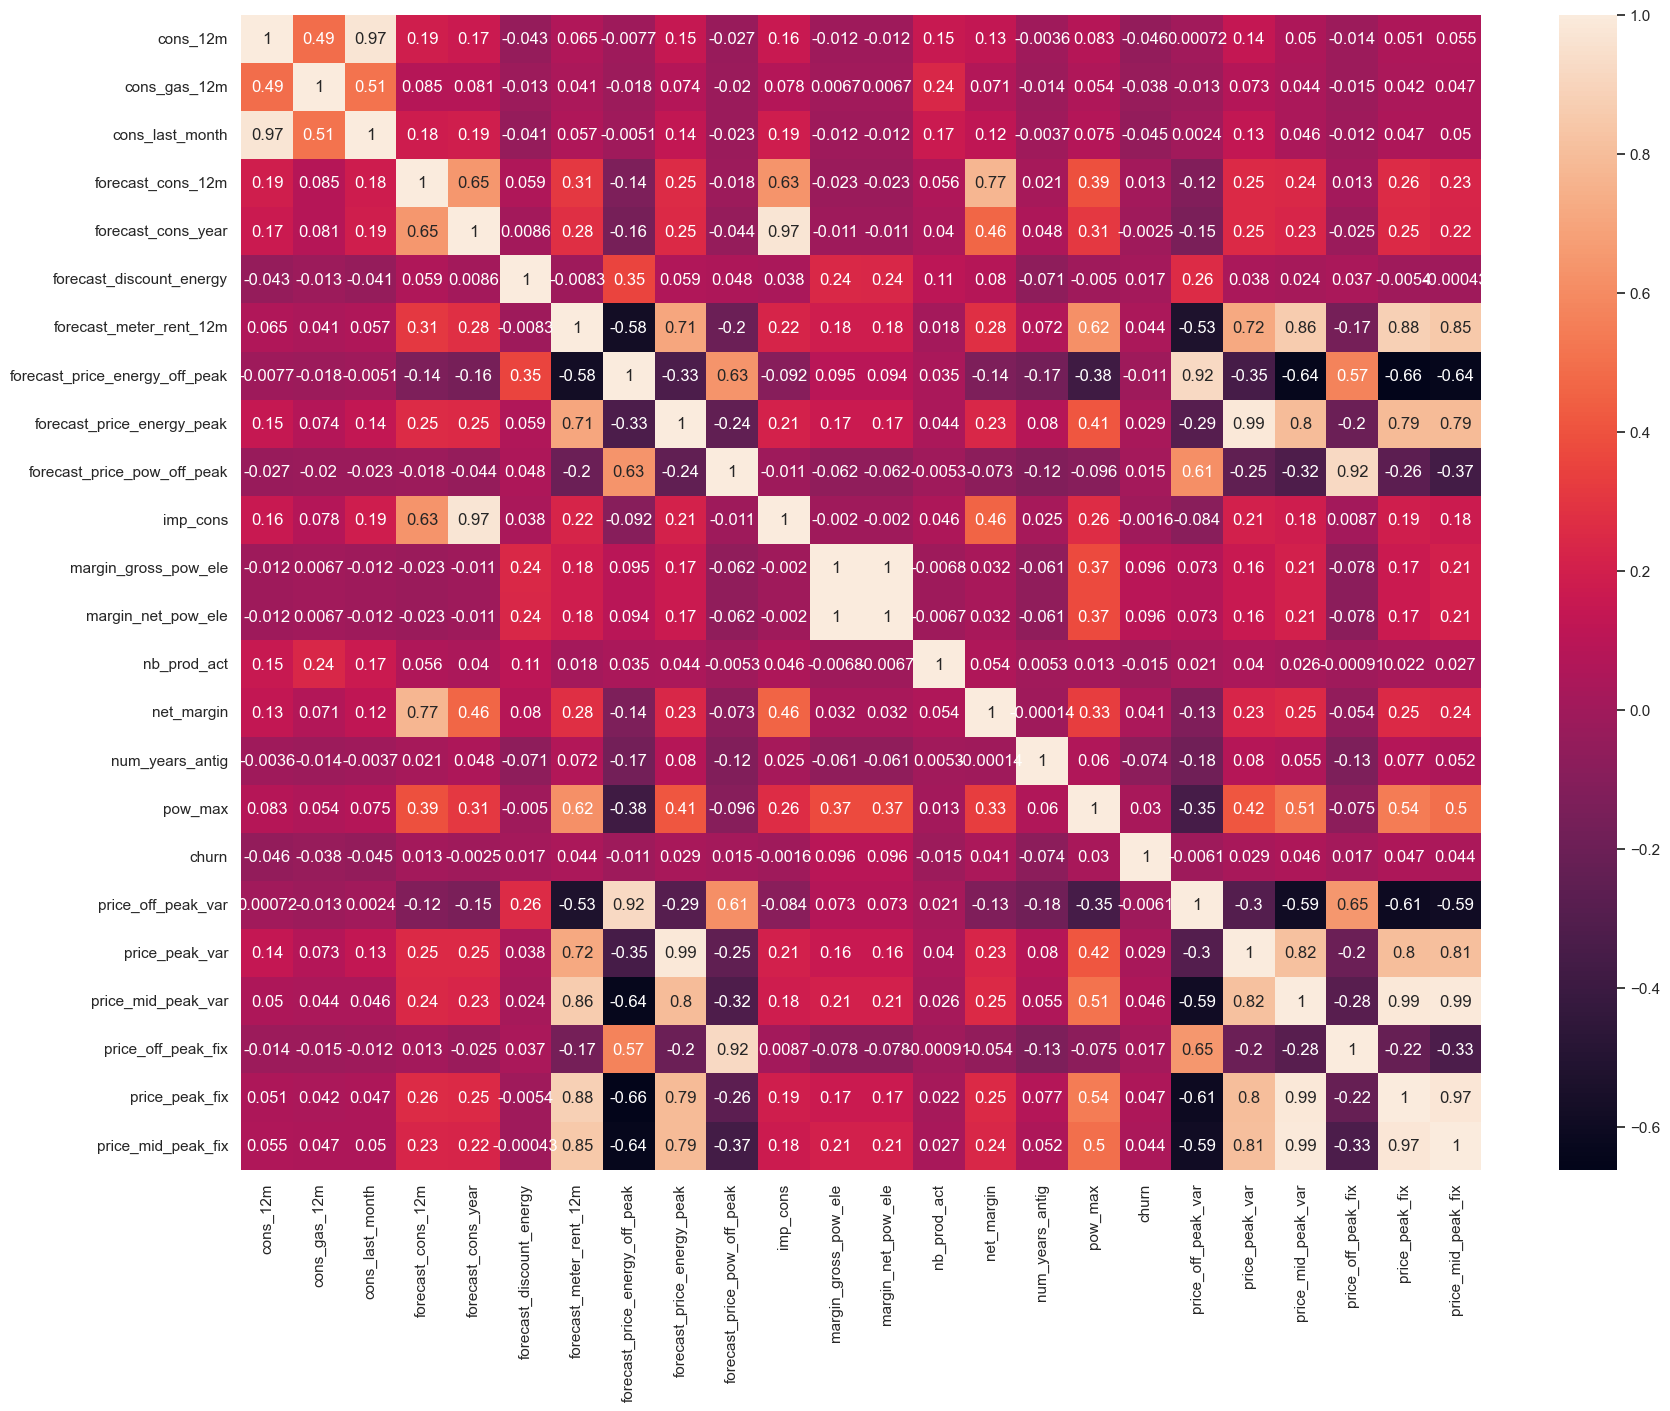

In [270]:
# CORRELATION
plt.figure(figsize = (20,15))
sns.heatmap(merged_df.corr(numeric_only = True), annot = True)
plt.show()

# This does not show any linear correlation with features